In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
matplotlib.rcParams = matplotlib.rcParamsDefault
matplotlib.rcParams['figure.figsize'] = (12,6)
plt.style.use('ggplot')
%matplotlib inline

In [164]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('./test_label/y_test.csv')
df = X_test.merge(y_test, on='carID')

In [165]:
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0,23495
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0,59999
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0,16713
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0,46000


In [166]:
df.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,15784.043039,2016.720434,24617.528443,153.261602,49.787275,2.135105,23784.075599
std,2197.045979,2.898906,23142.032992,80.742530,35.269981,0.768596,16600.736576
min,12000.000000,1970.000000,1.000000,0.000000,2.800000,0.000000,795.000000
25%,13889.750000,2016.000000,6000.000000,145.000000,37.700000,1.600000,12490.750000
50%,15777.500000,2017.000000,18548.000000,145.000000,47.100000,2.000000,19495.000000
75%,17661.500000,2019.000000,36272.250000,160.000000,54.300000,2.800000,30500.000000
max,19631.000000,2020.000000,167054.000000,580.000000,470.800000,6.300000,159999.000000


In [167]:
df.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [168]:
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0,23495
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0,59999
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0,16713
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0,46000


In [169]:
df.model.unique()

array([' GLS Class', ' Amarok', ' Scala', ' RS6', ' Combo Life',
       ' GL Class', ' CLS Class', ' Prius', ' Tiguan Allspace',
       ' S Class', ' Beetle', ' Edge', ' RS3', ' Fusion', ' 7 Series',
       ' Galaxy', ' 6 Series', ' Santa Fe', ' M5', ' Grand C-MAX',
       ' IX20', ' Hilux', ' X-CLASS', ' X4', ' Puma', ' X7', ' Avensis',
       ' Land Cruiser', ' Kamiq', ' A8', ' Shuttle', ' CC', ' Scirocco',
       ' M2', ' I800', ' Arteon', ' A7', ' I40', ' Yeti', ' IX35',
       ' V Class', ' Mustang', ' Z4', ' M4', ' Supra', ' Caravelle',
       ' Verso', ' GLB Class', ' S3', ' M Class', ' Agila', ' KA',
       ' Tourneo Custom', ' Grand Tourneo Connect', ' X6', ' Rapid',
       ' Antara', ' RS5', ' PROACE VERSO', ' CLK', ' i3', ' GTC', ' SLK',
       ' Getz', ' Caddy Maxi Life', ' California', ' M3', ' SQ7',
       ' Camry', ' CLA Class', ' G Class', ' Zafira Tourer', ' RS4',
       ' Roomster', ' Jetta', ' Q8', ' GT86', ' i8', ' R8', ' 8 Series',
       ' Tourneo Connect', ' IQ',

There is a whitespace in front of some of the model names which I will remove.

In [170]:
df['model'] = df['model'].str.strip(' ')

In [171]:
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [172]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 0 to 2671
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         2672 non-null   int64  
 1   brand         2672 non-null   object 
 2   model         2672 non-null   object 
 3   year          2672 non-null   int64  
 4   transmission  2672 non-null   object 
 5   mileage       2672 non-null   int64  
 6   fuelType      2672 non-null   object 
 7   tax           2672 non-null   float64
 8   mpg           2672 non-null   float64
 9   engineSize    2672 non-null   float64
 10  price         2672 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 250.5+ KB


Text(0, 0.5, 'Count')

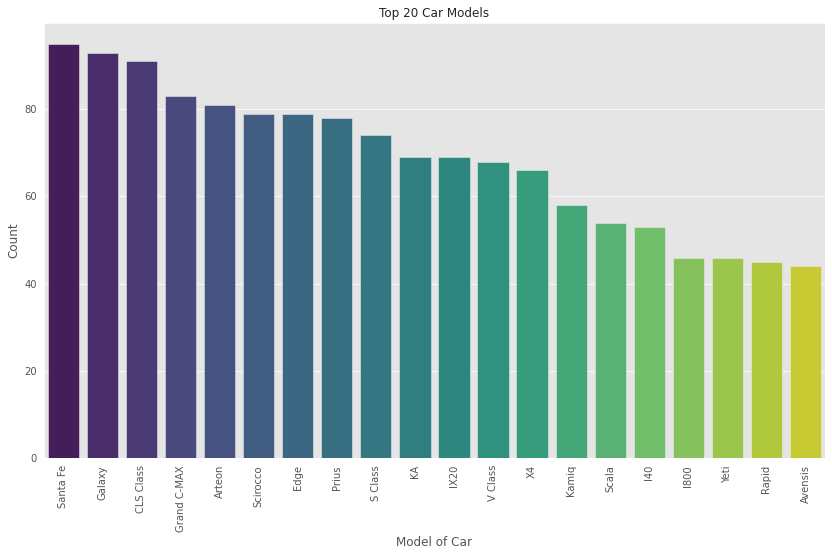

In [174]:
plt.figure(figsize=(14,8))
sns.barplot(x='index', y='model', data=pd.DataFrame(df.model.value_counts().sort_values(ascending=False)).reset_index().iloc[:20], palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 20 Car Models")
plt.xlabel("Model of Car")
plt.ylabel("Count")


Text(0.5, 1.0, 'Total Count of Brands Present in Dataset')

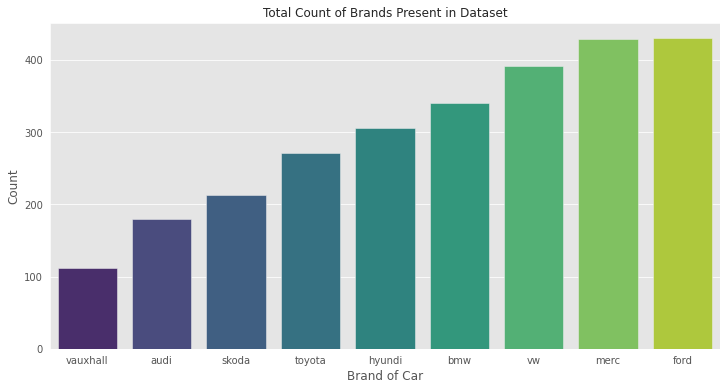

In [175]:
plt.figure(figsize=(12,6))

sns.barplot(x='index', y='brand', data=pd.DataFrame(df.brand.value_counts().sort_values()).reset_index(), palette='viridis')
plt.xlabel("Brand of Car")
plt.ylabel("Count")
plt.title("Total Count of Brands Present in Dataset")

In [176]:
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0,23495
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0,59999
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0,16713
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0,46000


Text(0.5, 0, 'Brand')

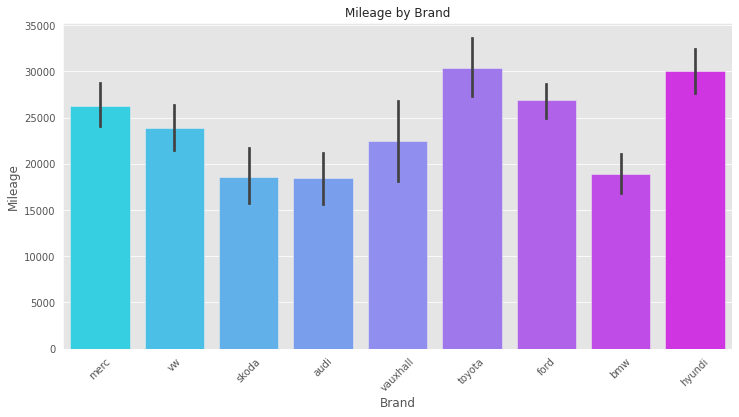

In [177]:
plt.figure(figsize=(12,6))
sns.barplot(x='brand', y='mileage', data=df, palette='cool')
plt.title("Mileage by Brand")
plt.xticks(rotation=45)
plt.ylabel("Mileage")
plt.xlabel("Brand")
# plt.savefig('test.png', facecolor='w', bbox_inches='tight')

C:\Users\adrie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\adrie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


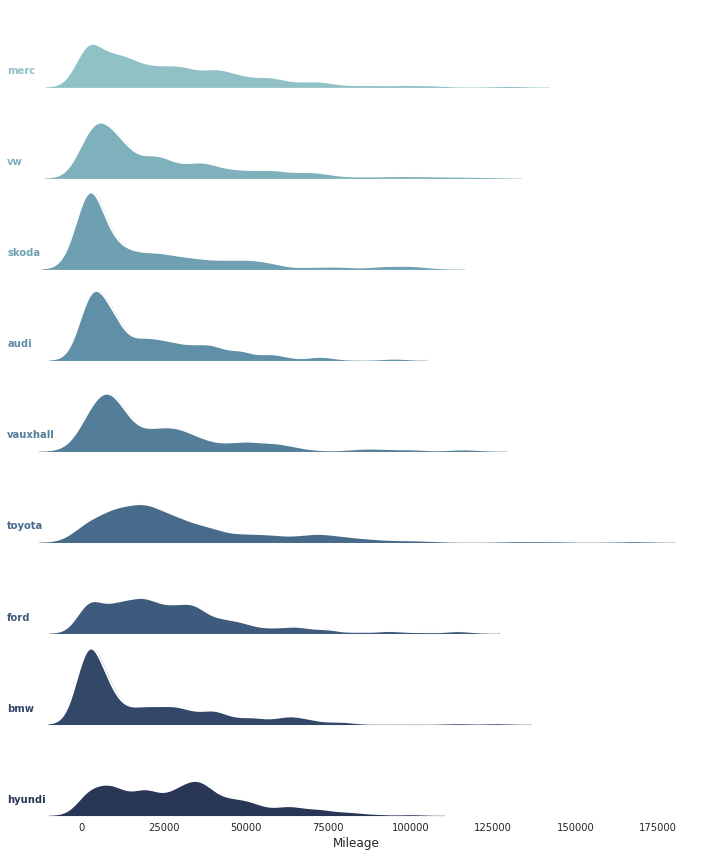

In [178]:
sns.set_style('white')
g = sns.FacetGrid(df, row='brand', hue='brand', aspect=15, height=.5, palette=sns.cubehelix_palette(10, rot=-.25, light=.7))
g.map(sns.kdeplot, "mileage", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'mileage', clip_on=False, color="w", lw=2, bw_adjust=.5)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, 'mileage')

# Remove axes details that don't play well with overlap


g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.fig.set_figheight(12)
g.fig.set_figwidth(10)
g.fig.figure.set_tight_layout(tight='tight')
plt.xlabel("Mileage")
plt.show()
g.despine(bottom=False, left=False)

#### Categorical Data vs. Price:

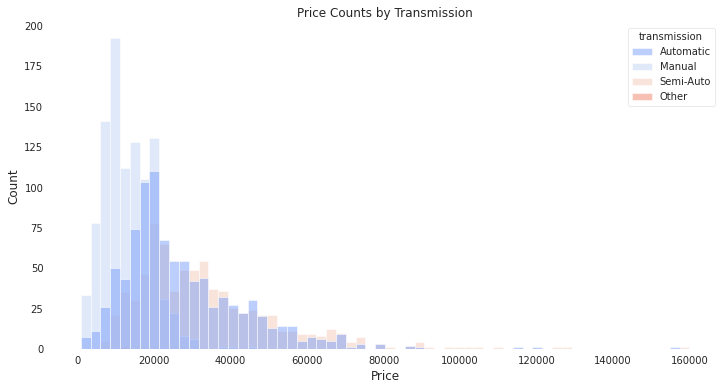

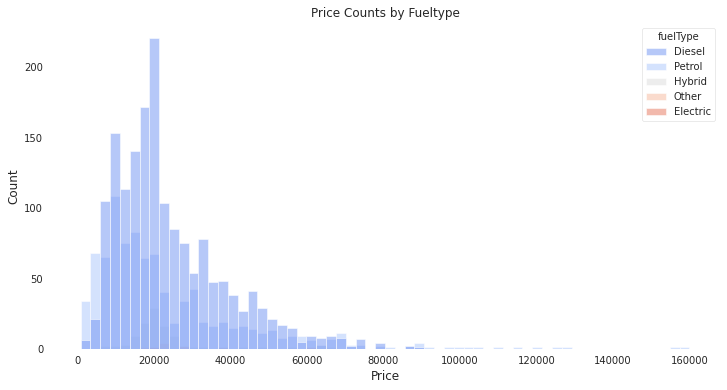

In [179]:
cols = ['transmission', 'fuelType']

for col in cols:
    plt.figure(figsize=(12,6))
    g = sns.histplot(x='price', hue=col, data=df, palette = 'coolwarm')
    plt.xlabel("Price")
    plt.title(f"Price Counts by {col.title()}")
    plt.show()

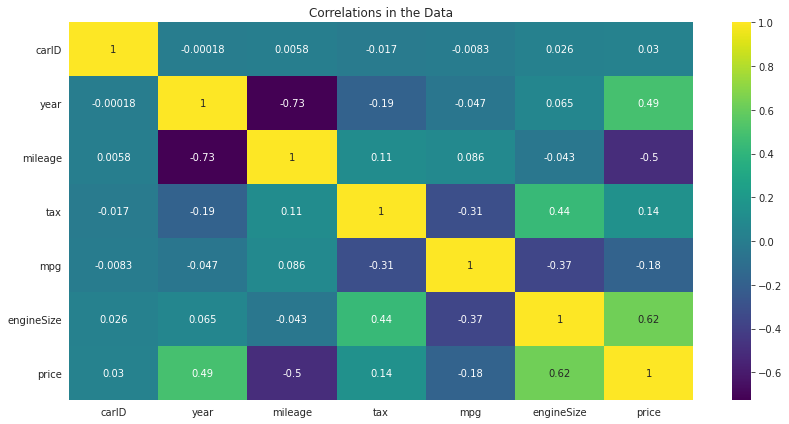

In [191]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlations in the Data")
plt.tight_layout()

We'll go after a few of these with graphs, namely:
- Year vs. Price
- Tax vs. Engine Size
- Engine Size vs. Price

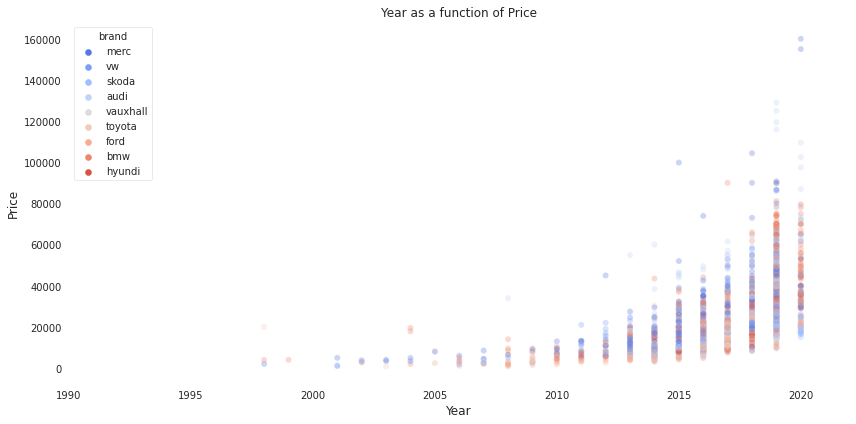

In [181]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='year', y='price', data=df, hue='brand', palette='coolwarm', linewidth=.2, alpha=.3)
plt.title("Year as a function of Price")
plt.xlim(1990, 2022)
plt.xlabel("Year")
plt.ylabel("Price")
plt.tight_layout()

It appears the range of cars available over time gets wider, but there are still various cars available at different price points.

(0.0, 150000.0)

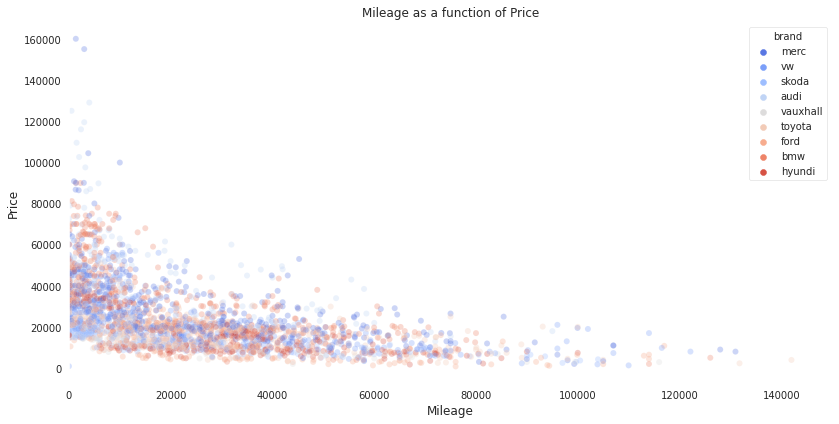

In [182]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='mileage', y='price', data=df, hue='brand', palette='coolwarm', linewidth=.2, alpha=.3)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage as a function of Price")
plt.tight_layout()
plt.xlim(0, 150000)

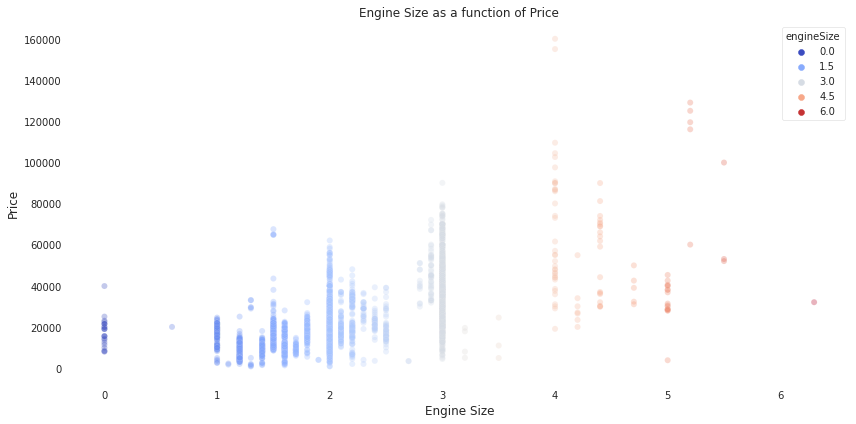

In [183]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='engineSize', y='price', data=df, palette='coolwarm', linewidth=.2, alpha=.3, hue='engineSize')
plt.title("Engine Size as a function of Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.tight_layout()

One more interesting one is the negative correlation between year and mileage

Text(0, 0.5, 'Mileage')

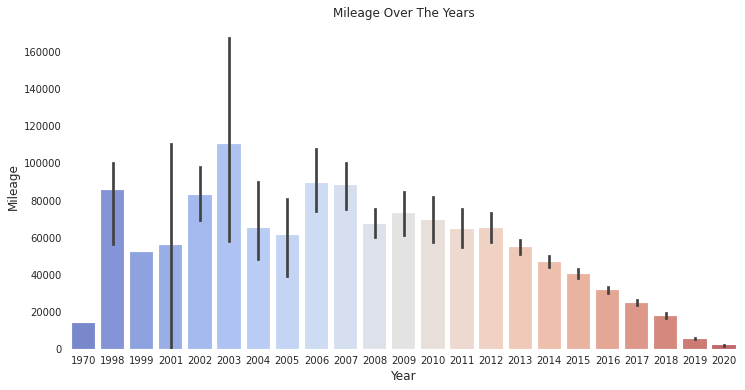

In [205]:
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='mileage', data=df , linewidth=.2, alpha=.8, palette='coolwarm')
plt.title("Mileage Over The Years")
plt.xlabel("Year")
plt.ylabel("Mileage")

Probably a bit obvious in nature, but still cool to see. We'd naturally expect older cars to have more miles on them.

Here I will export the data for model building in another set of notebooks

In [207]:
df.to_csv('UsedCarFinal.csv')